# Business Case: Predicting the lead category whether it is High Potential lead   or Low Potential lead from the given sales dataset. 

In [2]:
## Importing the libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('final_data.csv')

In [6]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [71]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [72]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [73]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [75]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,10-05-2018 12:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [76]:
# Splitting Created Column to to convert date and time, so that our model will work efficiently.
data[['Created_date','Created_time']] = data['Created'].str.split(' ', n=1, expand=True)

In [77]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_date,Created_time
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14-11-2018,10:05
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:22
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:21
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,08:46
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,07:34
...,...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28-04-2018,09:45
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28-04-2018,09:43
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28-04-2018,09:20
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28-04-2018,08:04


In [78]:
# Extracting Hours
data["Created_hour"] = pd.to_datetime(data["Created_time"]).dt.hour

# Extracting Minutes
data["Created_min"] = pd.to_datetime(data["Created_time"]).dt.minute


In [79]:
data["Created_day"] = pd.to_datetime(data.Created_date, format="%d-%m-%Y").dt.day
data["Created_month"] = pd.to_datetime(data["Created_date"], format = "%d-%m-%Y").dt.month
data["Created_year"] = pd.to_datetime(data.Created_date, format="%d-%m-%Y").dt.year


In [80]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'Created_date', 'Created_time',
       'Created_hour', 'Created_min', 'Created_day', 'Created_month',
       'Created_year'],
      dtype='object')

In [81]:
data.drop(['Created','Created_date','Created_time'], axis=1, inplace=True) # Dropping columns after conversion.

In [82]:
data.head()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month,Created_year
0,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,10,5,14,11,2018
1,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,9,22,14,11,2018
2,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,9,21,14,11,2018
3,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,8,46,14,11,2018
4,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,7,34,14,11,2018


In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

In [83]:
# Dropping Mobile and Email because it contains all unique & unspecified values and dropping Created_year also because its all 2018.
data.drop(['Mobile','EMAIL','Created_year'], axis=1, inplace=True)

In [84]:
# After Doing Domain Analysis I concluded that 'Open', 'Potential', 'In Progress Positive', 'CONVERTED','Long Term', 'converted' are Potential Lead or High Potential Lead.
# on the other hand 'Not Responding', 'Just Enquiry', 'Junk Lead', 'In Progress Negative' & 'LOST' are NonPotential Lead or Low Potential Lead.
data.replace({"Open": "Potential", "Potential": "Potential", "In Progress Positive": "Potential", "Not Responding": "Nonpotential", "Just Enquiry": "Nonpotential", "Junk Lead": "Nonpotential", "CONVERTED": "Potential", "In Progress Negative": "Nonpotential", "LOST": "Nonpotential", "Long Term": "Potential", "converted": "Potential"}, inplace = True)

In [85]:
data.Status.value_counts()

Nonpotential    4491
Potential       2931
Name: Status, dtype: int64

In [86]:
# Checking No. of unique values in each columns.
for col in data.select_dtypes('object').columns:
    print('No of unique {} \n {} \t column : {}\n {}' .format(len(data[col].unique()),col,data[col].unique(), data[col].value_counts()))
    print("*"*30)

No of unique 30 
 Product_ID 	 column : ['' '9' '19' '18' '15' '27' '5' '2' '3' '25' '10' '20' '11' '21' '1' '12'
 '13' '17' '24' '26' '16' '23' '22' '8' '14' '6' '0' '28' '7' '4']
 18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
17       7
6        7
3        7
8        6
13       5
24       3
16       3
0        2
23       2
7        1
28       1
4        1
Name: Product_ID, dtype: int64
******************************
No of unique 26 
 Source 	 column : ['Website' '' 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Co

In [87]:
# As we can see there are some constant values in some columns.
# So I m doing manual imputation in each column.
# doing imputation in Product_ID. Imputing with the most common value which is 18
data['Product_ID'] = data['Product_ID'].replace([''],'18')

# doing imputation in Source. Imputing with the most common value which is Call
data['Source'] = data['Source'].replace([''],'Call')

# doing imputation in Sales_Agent. Imputing with the most common value which is Sales-Agent-4
data['Sales_Agent'] = data['Sales_Agent'].replace([''],'Sales-Agent-4')

# doing imputation in Location. Imputing with the most common value which is Other Locations
data['Location'] = data['Location'].replace([''],'Other Locations')

In [88]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,Potential,10,5,14,11
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,Potential,9,22,14,11
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,Potential,9,21,14,11
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,Potential,8,46,14,11
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,Potential,7,34,14,11


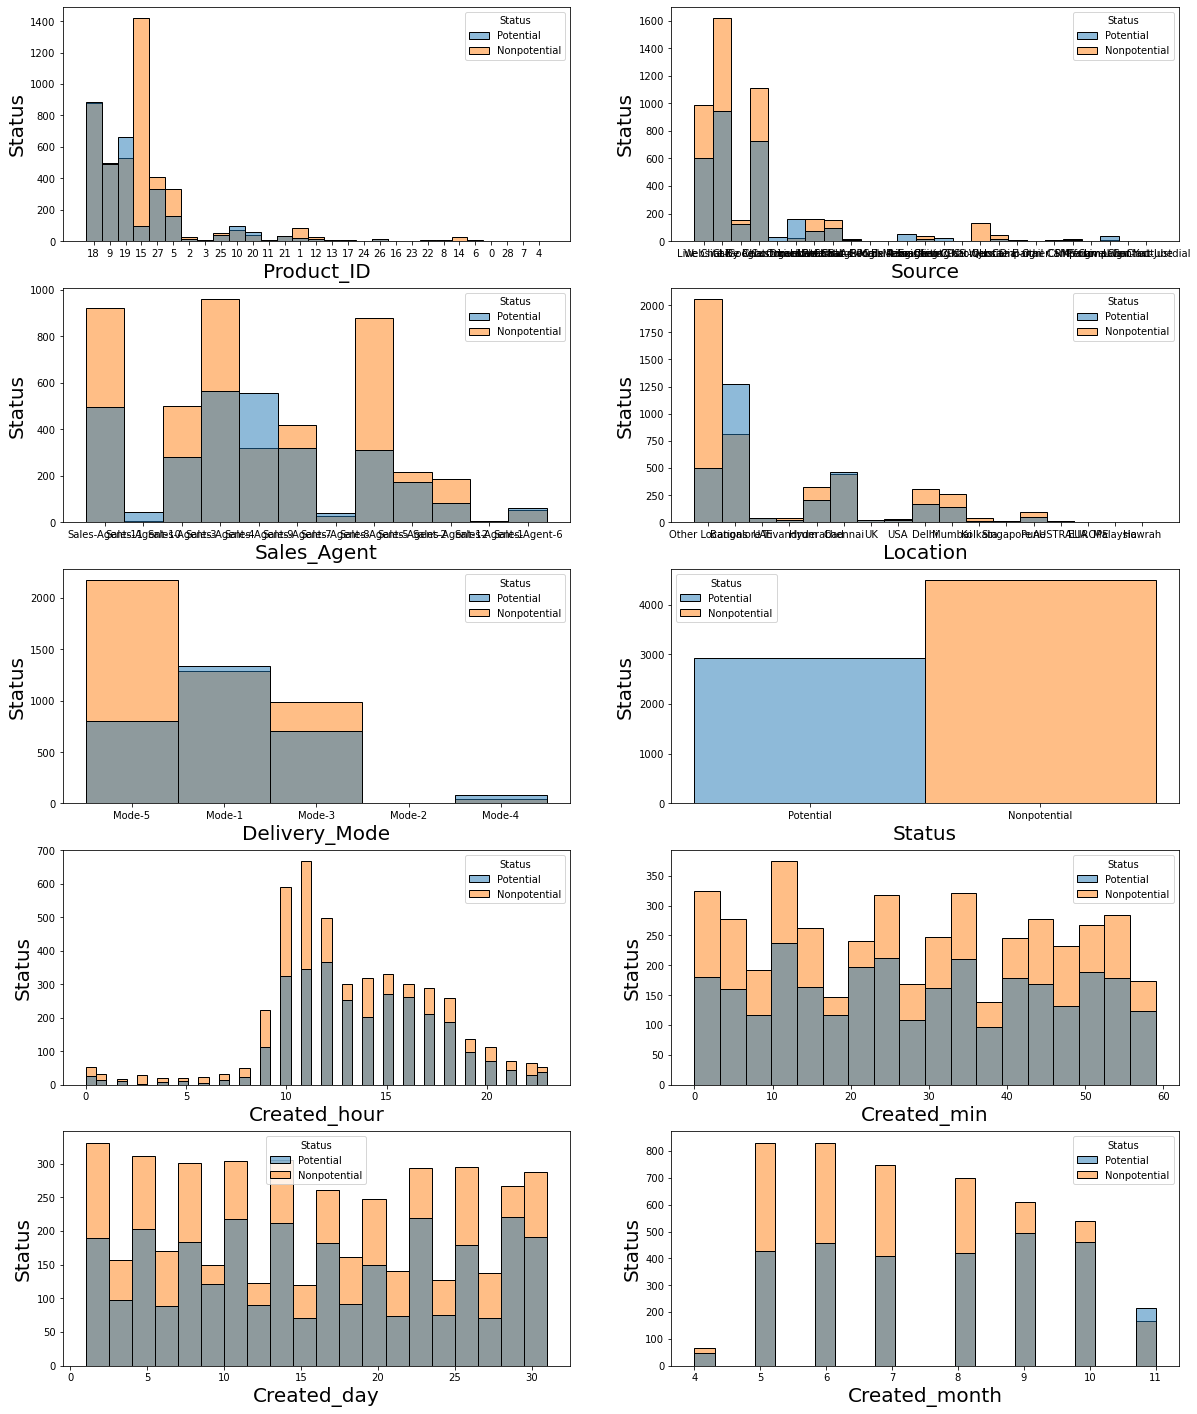

In [89]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 : # as there are 10 columns in the dataset.
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data[column],hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.show()

# From Above graphical representation and from sweetviz analysis we get insights:-

### 1) Product ID 15 has highest number of Nonpotential lead.
### 2) Delivery_Mode Mode-1 has only Potential Lead and Mode-4 also but having really less amount of deliveries from Mode-4.
### 3) There are most number of lead from Other Locations and having most number of Nonpotential Lead.
### 4) Sales_Agent 4,5 and 11 provides maximum no. of lead but most of them are Nonpotential.
### 5) From Source Call, Live Chat-Direct and Website we are getting highest no. of lead.

# Handling Categorical Data

In [90]:
# Converting Source using Frequency encoder
# grouping by frequency
fq = data.groupby('Source').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('Source')] = data['Source'].map(fq)
# drop original column.
data = data.drop(['Source'], axis = 1)

In [91]:
data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', 'Sales-Agent-8',
       'Sales-Agent-5', 'Sales-Agent-2', 'Sales-Agent-12',
       'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [92]:
# Handling Sales_Agent using Label Encoder.
data.replace({'Sales-Agent-1': 1, 'Sales-Agent-2': 2, 'Sales-Agent-3': 3, 'Sales-Agent-4': 4, 'Sales-Agent-5': 5, 'Sales-Agent-6': 6, 'Sales-Agent-7': 7, 'Sales-Agent-8': 8, 'Sales-Agent-9': 9, 'Sales-Agent-10': 10, 'Sales-Agent-11': 11, 'Sales-Agent-12': 12}, inplace = True)

In [93]:
# Converting Location using Frequency encoder
# grouping by frequency
fq1 = data.groupby('Location').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('Location')] = data['Location'].map(fq1)
# drop original column.
data = data.drop(['Location'], axis = 1)

In [94]:
# As Delivery_Mode is Nominal Categorical data we will perform OneHotEncoding

Delivery_Mode = data[["Delivery_Mode"]]

Delivery_Mode = pd.get_dummies(Delivery_Mode)

data = pd.concat([data,Delivery_Mode],axis=1)

In [95]:
data.drop(['Delivery_Mode'], axis =1, inplace= True)

In [96]:
# Converting Status
data.replace({'Nonpotential': 0, 'Potential': 1}, inplace = True)

In [97]:
data.head(20)

,Product_ID,Sales_Agent,Status,Created_hour,Created_min,Created_day,Created_month,Source_freq_encode,Location_freq_encode,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,18,11,1,10,5,14,11,0.214767,0.344651,0,0,0,0,1
1,18,10,1,9,22,14,11,0.214767,0.344651,0,0,0,0,1
2,18,10,1,9,21,14,11,0.214767,0.344651,0,0,0,0,1
3,18,10,1,8,46,14,11,0.214767,0.344651,0,0,0,0,1
4,18,10,1,7,34,14,11,0.214767,0.344651,0,0,0,0,1
5,18,10,1,7,33,14,11,0.214767,0.344651,0,0,0,0,1
6,18,10,1,5,58,14,11,0.214767,0.344651,0,0,0,0,1
7,18,10,1,5,49,14,11,0.214767,0.344651,0,0,0,0,1
8,18,10,1,5,40,14,11,0.214767,0.344651,0,0,0,0,1
9,18,10,1,5,6,14,11,0.214767,0.344651,0,0,0,0,1


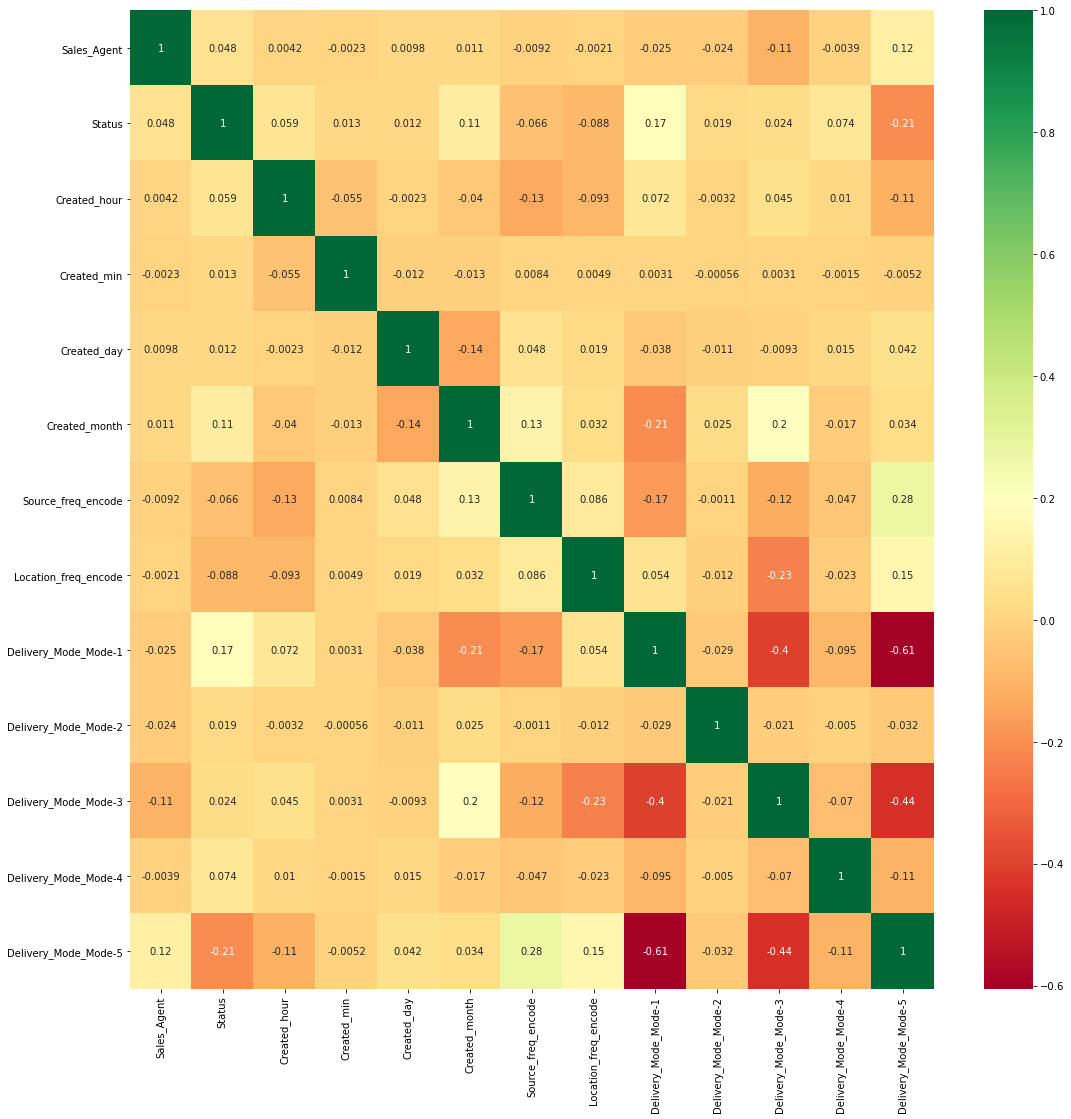

In [98]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [99]:
# Creating Dependent and independent variable
x=data.drop(columns = ['Status']) ## independent varable
y= data['Status'] ## dependent or target variable

In [100]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

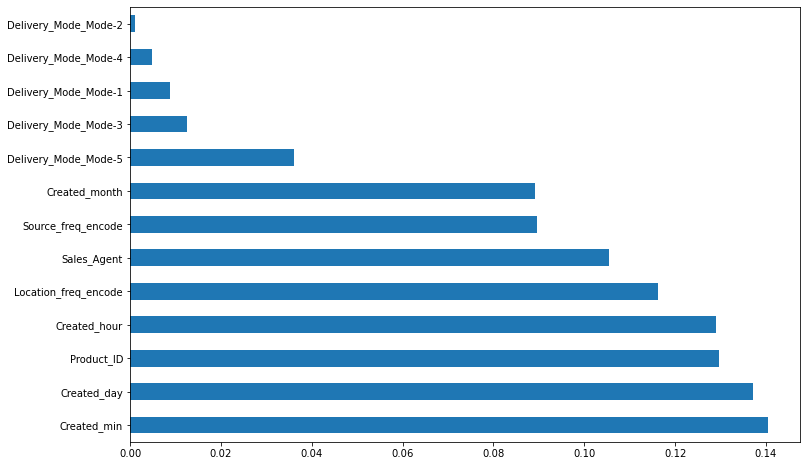

In [101]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


### From Above Representation it is concluded that Creation Period, Product_ID, Location and Sales_Agent really effects the Status of lead.

# Model Creation

In [129]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size= 0.25,random_state=42)

# Logestic Regression

In [130]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [131]:
y_pred = log_reg.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1111
           1       0.62      0.35      0.45       745

    accuracy                           0.65      1856
   macro avg       0.64      0.60      0.60      1856
weighted avg       0.64      0.65      0.63      1856



In [133]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.6020393985707295

In [134]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.70716299 0.75424723 0.67552658 0.65271137 0.58806449]
Cross validation Score: 0.675542532421497
Std : 0.05543997309068583


# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
## taking optimal k how many clusters to create
error_rate = []
# Will take some time
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

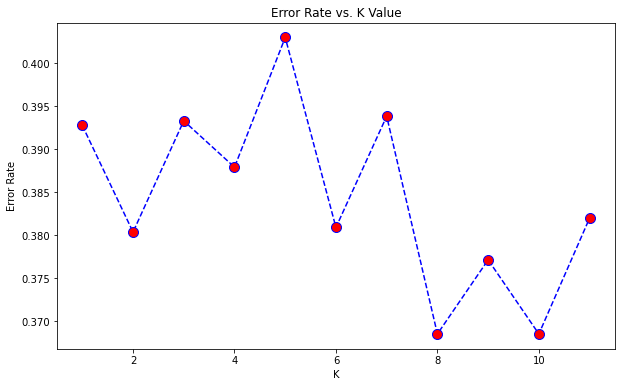

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [137]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [138]:
y_pred1 = knn.predict(x_test)

In [139]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1111
           1       0.55      0.27      0.37       745

    accuracy                           0.62      1856
   macro avg       0.59      0.56      0.55      1856
weighted avg       0.60      0.62      0.58      1856



In [140]:
score=roc_auc_score(y_test,y_pred1)
score

0.562655325935278

In [141]:
scores = cross_val_score(knn,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.57781062 0.57254078 0.58295739 0.58823552 0.59313453]
Cross validation Score: 0.5829357682092018
Std : 0.007299664836253028


# SVC

In [143]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)

In [144]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1111
           1       0.00      0.00      0.00       745

    accuracy                           0.60      1856
   macro avg       0.30      0.50      0.37      1856
weighted avg       0.36      0.60      0.45      1856



In [145]:
score=roc_auc_score(y_test,y_pred2)
score

0.5

In [146]:
scores = cross_val_score(svc,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.65095063 0.67907269 0.64075838 0.64960815 0.5407561 ]
Cross validation Score: 0.6322291895304281
Std : 0.04751190938767987


# Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [148]:
y_pred3=rf_clf.predict(x_test)

In [149]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1111
           1       0.66      0.51      0.57       745

    accuracy                           0.70      1856
   macro avg       0.69      0.67      0.67      1856
weighted avg       0.69      0.70      0.69      1856



In [150]:
score=roc_auc_score(y_test,y_pred3)
score

0.666161448359601

In [151]:
scores = cross_val_score(rf_clf,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.72268395 0.3901823  0.47371862 0.61778165 0.64878342]
Cross validation Score: 0.5706299866152298
Std : 0.12116503259858018


## Hyperparameter Tuning of the Model

In [156]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True})


In [157]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)

In [158]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1111
           1       0.68      0.51      0.59       745

    accuracy                           0.71      1856
   macro avg       0.70      0.68      0.68      1856
weighted avg       0.71      0.71      0.70      1856



In [160]:
score=roc_auc_score(y_test,y_predict)
score

0.6771679181340953

In [161]:
scores = cross_val_score(rf_clf2,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.73630214 0.42692297 0.46556056 0.6115353  0.65798665]
Cross validation Score: 0.5796615245932369
Std : 0.11664916672928576


# Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)

In [153]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1111
           1       0.56      0.55      0.56       745

    accuracy                           0.65      1856
   macro avg       0.63      0.63      0.63      1856
weighted avg       0.65      0.65      0.65      1856



In [154]:
score=roc_auc_score(y_test,y_pred4)
score

0.6313666265955454

In [155]:
scores = cross_val_score(dt,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.55937764 0.27183693 0.40325866 0.49610245 0.53040127]
Cross validation Score: 0.4521953915166617
Std : 0.10436091499822789


# CONCLUSION : After considering the performance of all the models on the basis of Accuracy, f1 Score, ruc score and cross-validation it is concluded that Random Forest should be selected as our final model.
  

### Saving the model

In [162]:
import pickle
import joblib
joblib.dump(rf_clf2,'model.pkl') # .pkl pickle

['model.pkl']